In [0]:
from google.colab import drive
drive.mount('./drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./drive


Bism  
# Imports

In [0]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import os

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import sklearn.metrics as sklm
from sklearn.manifold import TSNE

# PhoneLevel_OCSVM_TrainL2_TestL2

In [2]:
phones = [file[:-4] for file in os.listdir('./drive/My Drive/Thesis Work/L2 Phones/Train/')]
len(phones)

42

In [0]:
phone = 'AA'

### Training

#### X_TRAIN

In [98]:
X_train = np.load('./drive/My Drive/Thesis Work/L2 Phones/Train/'+phone+'.npy')
X_train = X_train.reshape(X_train.shape[0],-1)
np.random.shuffle(X_train)
X_train.shape

(648, 1950)

#### Y_TRAIN

In [99]:
X_test = np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/x.npy')
y_test = np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/y.npy')

X_test = X_test.reshape(X_test.shape[0],-1)
X_test.shape

(451, 1950)

I now have X and y

#### Visualising the features

In [0]:
def plotTrainTestScatter(phone):
  print("Phone: ",phone)
  X_train = np.load('./drive/My Drive/Thesis Work/L2 Phones/Train/'+phone+'.npy')
  X_train = X_train.reshape(X_train.shape[0],-1)
  np.random.shuffle(X_train)
  
  X_test = np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/x.npy')
  y_test = np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/y.npy')
  X_test = X_test.reshape(X_test.shape[0],-1)

  X_test2D = TSNE(n_components=2).fit_transform(X_test)
  X_train2D = TSNE(n_components=2).fit_transform(X_train)

  print(X_train2D.shape)
  print(X_test2D.shape)

  plt.scatter(X_train2D[:, 0], X_train2D[:, 1],c='g')
  plt.scatter(X_test2D[:, 0][y_test == 0], X_test2D[:, 1][y_test == 0],c='r')
  plt.scatter(X_test2D[:, 0][y_test == 1], X_test2D[:, 1][y_test == 1],c='b')

Phone:  B
(1177, 2)
(420, 2)


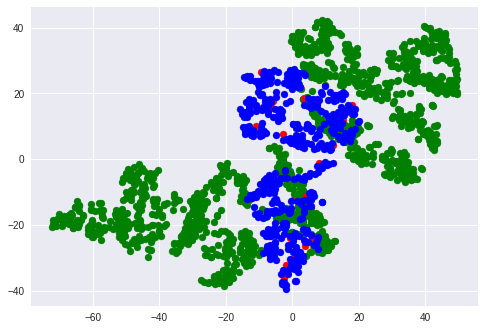

In [7]:
plotTrainTestScatter(phone)

#### PCA

In [100]:
X_train.shape

(648, 1950)

<BarContainer object of 648 artists>

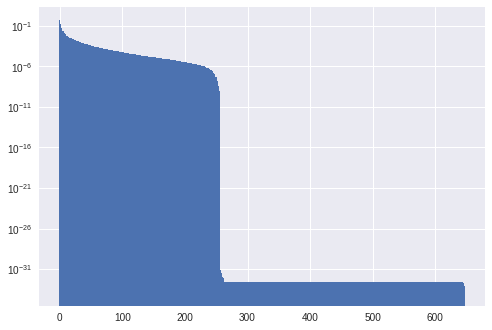

In [101]:
n_components = min(X_train.shape[0],X_train.shape[1])
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
plt.bar(range(n_components),pca.explained_variance_ratio_,1,log=True)

In [0]:
n_components = 250
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

In [0]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### MODEL

In [112]:
clf = svm.OneClassSVM(nu=0.285,kernel='rbf')
clf = clf.fit(X_train_pca)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
y_pred = clf.predict(X_test_pca) #pca ones here also

In [0]:
y_pred[y_pred == -1] = 0

In [115]:
print("Phone: ",phone)
print(classification_report(y_test, y_pred, target_names=['Mispronounced','Correct']))
print(confusion_matrix(y_test, y_pred, labels=range(2)))

print(sklm.roc_curve(y_test,y_pred))
print('FAR = ', sklm.roc_curve(y_test,y_pred)[0][1]*100,'%')
print('FRR = ', (1 - sklm.roc_curve(y_test,y_pred)[1][1])*100,'%')
print("AUC_SCORE = ", sklm.roc_auc_score(y_test,y_pred)*100,'%')

Phone:  AA
               precision    recall  f1-score   support

Mispronounced       0.15      0.50      0.23        76
      Correct       0.81      0.43      0.56       375

    micro avg       0.44      0.44      0.44       451
    macro avg       0.48      0.46      0.39       451
 weighted avg       0.70      0.44      0.50       451

[[ 38  38]
 [215 160]]
(array([0. , 0.5, 1. ]), array([0.        , 0.42666667, 1.        ]), array([2, 1, 0]))
FAR =  50.0 %
FRR =  57.33333333333333 %
AUC_SCORE =  46.333333333333336 %


Better than Simple SVM